# Week 1B: Exploratory Data Science in Python

9/3/2020

## Today

- Introduction to Pandas
- Key data analysis concepts
- Example: Zillow + Census housing data

## Reminder: The weekly workflow

- You'll set up your local Python environment as part of first homework assignment (posted today!)
- Each week, you will have two options to follow along with lectures:
    1. Using Binder in the cloud, launching via the button on the week's repository
    1. Download the week's repository to your laptop and launch the notebook locally
- Work on homeworks locally on your laptop — Binder is only a *temporary* environment (no save features)

To follow along today, go to https://github.com/MUSA-550-Fall-2020/week-1

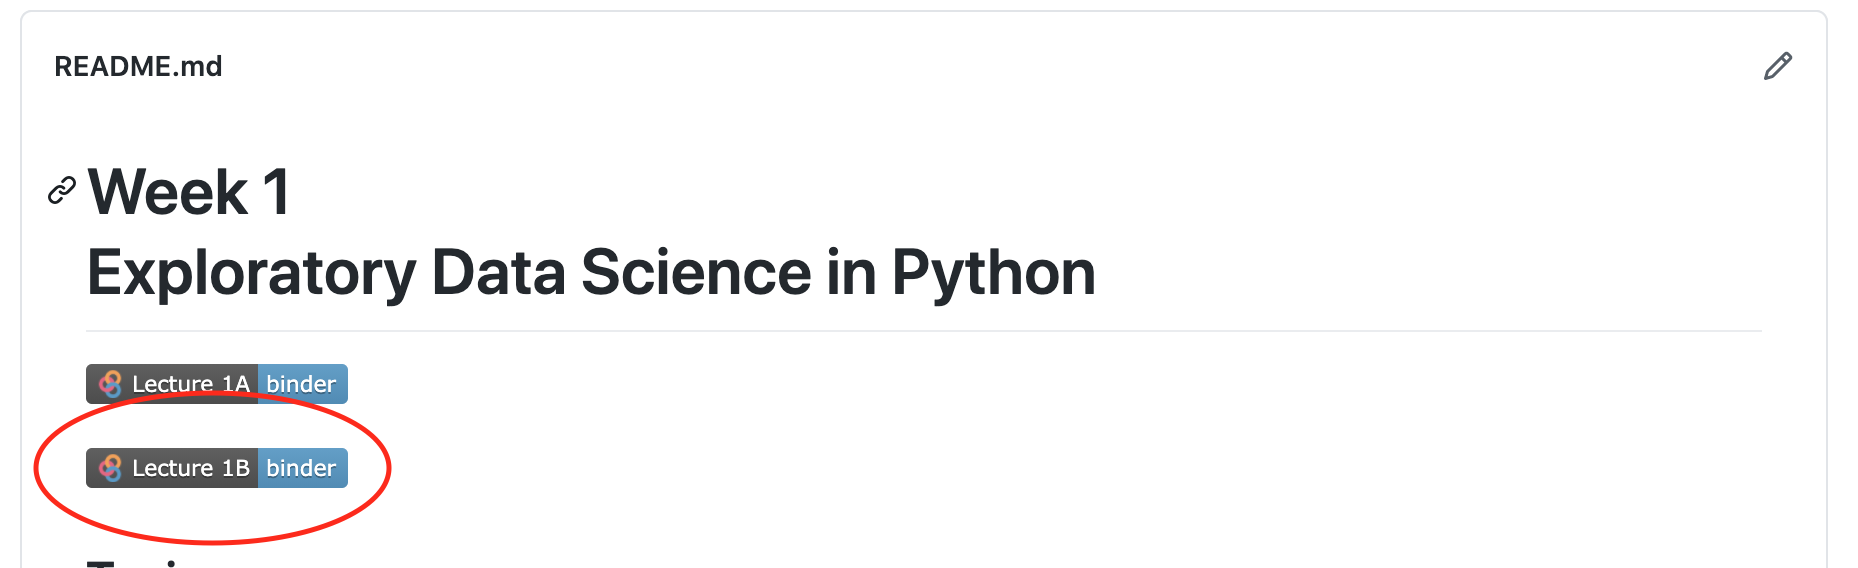

## Python Data Analysis: the *pandas* package

Documentation is available at https://pandas.pydata.org

<center>
<img src=attachment:download.png width=400></img>
</center>
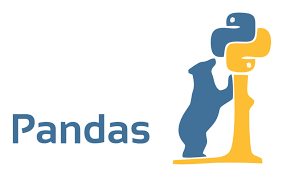

## The new, less fun logo

<center>
    <img width=500 src="https://raw.githubusercontent.com/pandas-dev/pandas/master/web/pandas/static/img/pandas.svg"></img>
</center>

The following line imports the *pandas* package:

In [1]:
import pandas as pd

## Basic *pandas* concepts

The primary *objects* in *pandas* are the:

  * **`DataFrame`**, which is very similar to an Excel spreadsheet, and has rows and named columns
  * **`Series`**, which represents a single column of data. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [R](https://www.r-project.org/about.html).

You can think `Series` objects as fancier versions of Python's built-in list data type

To create a `Series` object:

In [2]:
# city names and population
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199]) 

In [3]:
city_names

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. 

In [4]:
cities_df = pd.DataFrame({ 'City Name': city_names, 'Population': population })
cities_df

,City Name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


**Note:** always try to give your variables *meaningful names*. It will help immensely when you are trying to debug problems or when you're trying to understand the code you've written months later. 

## Accessing data

In [5]:
# access columns with a dict-like syntax
cities_df['Population']

0     852469
1    1015785
2     485199
Name: Population, dtype: int64

### Rows can be accessed using Python's syntax for slicing 

In [7]:
# list slicing: get the elements with indices 1 and 2 (but NOT 3)
cities_list = ['San Francisco', 'San Jose', 'Sacramento']
cities_list[1:3]

['San Jose', 'Sacramento']

Unfortunately the functionality for slicing lists is not that powerful...but pandas will have many more features!

In [8]:
# slicing data frame rows is very similar!
cities_df[1:3]

,City Name,Population
1,San Jose,1015785
2,Sacramento,485199


*pandas* includes functionality for many different ways of selecting data. See [the documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for many more examples. 

## Manipulating data

In [9]:
cities_df['Population'].min()

485199

[NumPy](http://www.numpy.org/) is a popular toolkit for scientific computing. 

*pandas* `Series` can be used as arguments to most NumPy functions:

In [10]:
import numpy as np

# calculate the median population value
np.median(cities_df['Population'])

852469.0

For more complex single-column transformations, you can use `Series.apply`. It accepts a function that is applied to each value in the `Series`.

For example, we can find which cities have a population greater than a million:

In [11]:
# define our function
def get_large_cities(population):
    return population > 1e6

large_cities_sel = cities_df['Population'].apply(get_large_cities)

In [12]:
large_cities_sel

0    False
1     True
2    False
Name: Population, dtype: bool

In [13]:
# add the new computed column to our original data frame
cities_df["Large Cities"] = large_cities_sel

# we can also use lambda (unnamed, inline) functions
cities_df["Small Cities"] = cities_df["Population"].apply(
    lambda  population: population < 1e6
)

# print out
cities_df

,City Name,Population,Large Cities,Small Cities
0,San Francisco,852469,False,True
1,San Jose,1015785,True,False
2,Sacramento,485199,False,True


### Data selection

We can select the "large" cities by passing the boolean values to the `.loc()` function of a `DataFrame`:

In [14]:
cities_df['Large Cities']

0    False
1     True
2    False
Name: Large Cities, dtype: bool

In [15]:
cities_df.loc[cities_df['Large Cities']]

,City Name,Population,Large Cities,Small Cities
1,San Jose,1015785,True,False


### There is a faster, more concise, to achieve this!

In [16]:
cities_df['Population'] > 1e6

0    False
1     True
2    False
Name: Population, dtype: bool

In [18]:
# this is equivalent to doing 
cities_df.loc[(cities_df['Population'] < 1e6)]

,City Name,Population,Large Cities,Small Cities
0,San Francisco,852469,False,True
2,Sacramento,485199,False,True


### What about getting rows where "Large Cities" is False?

Use the Python tilde operator to do a logicial *not* operation:

In [19]:
# reverse the large cities boolean selection
cities_df.loc[~large_cities_sel]

,City Name,Population,Large Cities,Small Cities
0,San Francisco,852469,False,True
2,Sacramento,485199,False,True


In [21]:
# or equivalently:
# NOTE: you need to put the whole expression in () and then apply the tilde!
cities_df.loc[~(cities_df['Population'] > 1e6)]

,City Name,Population,Large Cities,Small Cities
0,San Francisco,852469,False,True
2,Sacramento,485199,False,True


### An even faster way!

We can use the [pandas query function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html). 

The query() function will return a subset of your dataframe based on a string version of the boolean expression.

In [22]:
cities_df.query("Population > 1e6")

,City Name,Population,Large Cities,Small Cities
1,San Jose,1015785,True,False


## How to remember the specifics of all of these functions?

The documentation is your best friend! Use the question mark operator!

In [23]:
# use the question mark
pd.DataFrame.loc?

## Now onto a more interesting example...

## Analyzing trends in rentals rates over time

Let's load census data on rentals rates from the 2017 Amercian Community Survey. 

We've stored the data locally in the comma-separated value (CSV) format. Later in the course, you'll learn how to download them directly using Python.

Use the `read_csv()` function from *pandas*. The first argument to `read_csv()` is the file path to load.

In [24]:
census_df = pd.read_csv("./data/census/ACS_17_1YR_B25003.csv")

In [25]:
census_df.head(n=5)

,GEO.id,GEO.id2,GEO.display-label,HD01_VD01,HD02_VD01,HD01_VD02,HD02_VD02,HD01_VD03,HD02_VD03
0,1600000US0107000,107000,"Birmingham city, Alabama",90186,3374,40295,2507,49891,3372
1,1600000US0121184,121184,"Dothan city, Alabama",25192,875,14935,763,10257,722
2,1600000US0135896,135896,"Hoover city, Alabama",34058,1330,22913,1724,11145,1482
3,1600000US0137000,137000,"Huntsville city, Alabama",84750,2687,46677,2948,38073,2680
4,1600000US0150000,150000,"Mobile city, Alabama",78145,2673,41297,2323,36848,2325


Select certain columns and rename them.

- Total: Total occupied housing units
- Rentals: Renter-occupied housing units

In [26]:
## FIRST STEP: let's trim to the columns we want

# columns we want
columns = ['GEO.display-label', 'HD01_VD01', 'HD01_VD03']
census_df = census_df[columns]

In [28]:
# Peak at the dataframe with trimmed columns
census_df.head()

,GEO.display-label,HD01_VD01,HD01_VD03
0,"Birmingham city, Alabama",90186,49891
1,"Dothan city, Alabama",25192,10257
2,"Hoover city, Alabama",34058,11145
3,"Huntsville city, Alabama",84750,38073
4,"Mobile city, Alabama",78145,36848


In [30]:
## STEP 2: Let's rename the columns!

# rename columns
census_df.columns = ['City', 'Total', 'Rentals']

# Return the head (first 5 rows) from the cell
census_df.head()

,City,Total,Rentals
0,"Birmingham city, Alabama",90186,49891
1,"Dothan city, Alabama",25192,10257
2,"Hoover city, Alabama",34058,11145
3,"Huntsville city, Alabama",84750,38073
4,"Mobile city, Alabama",78145,36848


In [33]:
# Step 3: Add the rental rate as a new column
census_df['Rental Rate'] = census_df['Rentals'] / census_df['Total'] * 100

census_df.head()

,City,Total,Rentals,Rental Rate
0,"Birmingham city, Alabama",90186,49891,55.320116
1,"Dothan city, Alabama",25192,10257,40.715306
2,"Hoover city, Alabama",34058,11145,32.723589
3,"Huntsville city, Alabama",84750,38073,44.923894
4,"Mobile city, Alabama",78145,36848,47.153369


In [35]:
# How many rows are in the dataframe? --> use the len() operator

len(census_df)

608

We can select the largest cities by population using the `Series.isin()` function, which checks if each value in the `Series` is in the specified list. 

In [37]:
# Define the list of city names we want
top_cities_list = [
    "Philadelphia city, Pennsylvania",
    "New York city, New York",
    "Los Angeles city, California",
    "Houston city, Texas",
    "Chicago city, Illinois",
    "Phoenix city, Arizona",
]

In [38]:
# Use the isin() to test whether a row value is in a city
census_df["City"].isin(top_cities_list)

0      False
1      False
2      False
3      False
4      False
       ...  
603    False
604    False
605    False
606    False
607    False
Name: City, Length: 608, dtype: bool

In [39]:
# Now do the selection!
census_df.loc[census_df["City"].isin(top_cities_list)]  # select the valid rows

,City,Total,Rentals,Rental Rate
18,"Phoenix city, Arizona",559155,245335,43.876027
94,"Los Angeles city, California",1384851,878061,63.404727
275,"Chicago city, Illinois",1047695,577430,55.114322
426,"New York city, New York",3159674,2127881,67.344954
474,"Philadelphia city, Pennsylvania",606142,309279,51.024182
525,"Houston city, Texas",837686,479409,57.230155


Only 6 rows as expected!

Alternatively, we could use the query() function. The syntax is a bit different (and I always forget and have to look at the documentation).

In the query() string, you can reference existing variables by prefacing the variable name with an "@" symbol. 

For example:

In [40]:
# Get the rows where the City column is in "top_cities_list"
census_df.query("City in @top_cities_list")

,City,Total,Rentals,Rental Rate
18,"Phoenix city, Arizona",559155,245335,43.876027
94,"Los Angeles city, California",1384851,878061,63.404727
275,"Chicago city, Illinois",1047695,577430,55.114322
426,"New York city, New York",3159674,2127881,67.344954
474,"Philadelphia city, Pennsylvania",606142,309279,51.024182
525,"Houston city, Texas",837686,479409,57.230155


## An aside about string formatting

Python uses the "%" operator to insert variable values into strings. For example, the file name of the data we want to load for 2017 is:

In [41]:
year_str = "17"
path = "./data/census/ACS_%s_1YR_B25003.csv" % year_str
print(path)

./data/census/ACS_17_1YR_B25003.csv


See [this guide](https://www.learnpython.org/en/String_Formatting) on this type of string formatting for more info.

## Python f-strings

Python version 3.6 introduced a new and improved string formatting syntax, where the variable that is being inserted can be referenced directly using the variable name.

The variable name should be enclosed in curly braces inside the string:

In [42]:
year_str = "17"
path = f"./data/census/ACS_{year_str}_1YR_B25003.csv"
print(path)

./data/census/ACS_17_1YR_B25003.csv


For more info: see [this guide](https://realpython.com/python-f-strings/)

### Now let's load data from 2005 to 2017

Let's use a for loop to loop over each year value from 2005 to 2017

In [43]:
all_rental_data = []
for year in range(2005, 2018):
    
    #---------------------------------------------
    # Step 0: Print out year 
    # The variable year changes for each iteration of the loop
    #----------------------------------------------
    print(f"Loading data for year = {year}...")
    
    #---------------------------------
    # Step 1: Read data for this year
    #---------------------------------
    year_str = str(year) # convert integer value of "year" to a string
    year_str = year_str[2:] # extract the last two digits of the year string
    rental_df = pd.read_csv(f"./data/census/ACS_{year_str}_1YR_B25003.csv")
     
    #---------------------------------
    # Step 2: Columns we want
    #---------------------------------
    columns = ['GEO.display-label', 'HD01_VD01', 'HD01_VD03']
    rental_df = rental_df[columns]

    #---------------------------------
    # Step 3: Rename columns
    #---------------------------------
    rental_df.columns = ['City', 'Total', 'Rentals']
    
    #----------------------------------
    # Step 4: Calculate the rental rate
    #----------------------------------
    rental_df['Rental Rate'] = rental_df['Rentals'] / rental_df['Total'] * 100
    
    #----------------------------------
    # Step 5: Select the cities we want
    #----------------------------------
    selection = rental_df['City'].isin(top_cities_list)
    top_cities_df = rental_df.loc[selection].copy()
    
    #----------------------------------
    # Step 6: Add a column for the year
    #----------------------------------
    top_cities_df['Year'] = year
    
    #-----------------------------------
    # Step 7: Save this dataframe in the list
    #-----------------------------------
    all_rental_data.append(top_cities_df)

#---------------------------------------------------
# Step 8: After the for loop, combine all of the 
# data frames into one along the row axis
#---------------------------------------------------
all_rental_data = pd.concat(all_rental_data, axis=0)

Loading data for year = 2005...
Loading data for year = 2006...
Loading data for year = 2007...
Loading data for year = 2008...
Loading data for year = 2009...
Loading data for year = 2010...
Loading data for year = 2011...
Loading data for year = 2012...
Loading data for year = 2013...
Loading data for year = 2014...
Loading data for year = 2015...
Loading data for year = 2016...
Loading data for year = 2017...


In [44]:
# Note: the pd.concat() took a list of dataframes and converted them 
# into a single dataframe!
type(all_rental_data)

pandas.core.frame.DataFrame

In [45]:
all_rental_data.head()

,City,Total,Rentals,Rental Rate,Year
13,"Phoenix city, Arizona",503753,204914,40.677475,2005
75,"Los Angeles city, California",1284124,771325,60.066240,2005
218,"Chicago city, Illinois",1020605,525620,51.500825,2005
349,"New York city, New York",3026196,2023924,66.880136,2005
393,"Philadelphia city, Pennsylvania",565433,244792,43.292839,2005


In [46]:
# What about the tail?
all_rental_data.tail()

,City,Total,Rentals,Rental Rate,Year
94,"Los Angeles city, California",1384851,878061,63.404727,2017
275,"Chicago city, Illinois",1047695,577430,55.114322,2017
426,"New York city, New York",3159674,2127881,67.344954,2017
474,"Philadelphia city, Pennsylvania",606142,309279,51.024182,2017
525,"Houston city, Texas",837686,479409,57.230155,2017


In [47]:
# How many rows? Hopefully (6 cities x 13 years = 78!)
len(all_rental_data)

78

## Basic plotting: `matplotlib`

Much more to come next week. For now, we'll use some very simple plotting commands with Python's main plotting libary `matplotlib`.

Import the library we'll use from `matplotlib`.

In [48]:
from matplotlib import pyplot as plt

We'll use the `plot()` function which plots a simple `x` vs `y` line.

### The strategy

1. Create a figure axes to plot to
1. Loop over each unique city
1. Select the subset of the data for each city
1. Plot the 'Year' vs. 'Rental Rate' columns using the `plot()` function for the sub-selection data frame

### Note

To find the unique city names in the 'City' column, we can use the `unique()` function:

In [49]:
all_rental_data['City'].unique()

array(['Phoenix city, Arizona', 'Los Angeles city, California',
       'Chicago city, Illinois', 'New York city, New York',
       'Philadelphia city, Pennsylvania', 'Houston city, Texas'],
      dtype=object)

Phoenix city, Arizona
Los Angeles city, California
Chicago city, Illinois
New York city, New York
Philadelphia city, Pennsylvania
Houston city, Texas


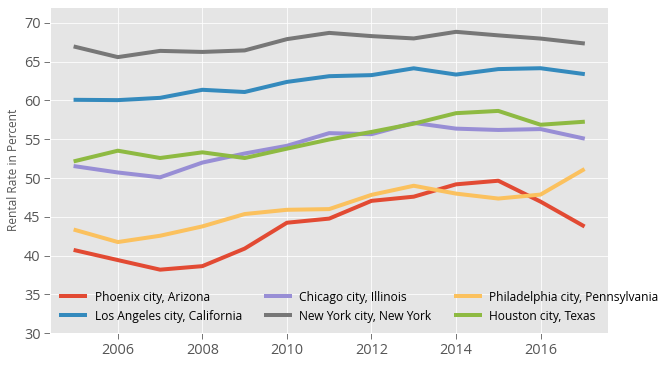

In [50]:
with plt.style.context('ggplot'):
    
    # Step 1: Create a figure and axes to plot on
    fig, ax = plt.subplots(figsize=(10,6))
    
    # Step 2: Loop over each city and plot
    for city in all_rental_data['City'].unique():
        
        # Print out the city in each loop iteration
        print(city)
        
        # Select data for this city
        this_city = all_rental_data['City'] == city
        city_df = all_rental_data.loc[this_city]
        
        # Plot Year vs Rental Rate
        ax.plot(city_df['Year'], city_df['Rental Rate'], label=city, linewidth=4)

    # Add a legend
    ax.legend(loc=0, ncol=3, fontsize=12)

    # Set the y limit
    ax.set_ylim(30, 72)

    # Add a y label
    ax.set_ylabel("Rental Rate in Percent");

**Note:** we used the "ggplot" theme to style our plots. Matplotlib comes with a number of built in styles: see all of the examples [here](https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html).

## From 2005 to 2017, Philadelphia had the largest percent increase

### Exercise: Can you calculate what the increase was for Philadelphia? 

You will need to:
- Trim the full data set to just Philadelphia 
- Select the rental rate for 2017
- Select the rental rate for 2005
- Calculate the percent change

## Exercise solution

In [51]:
# trim to just Philadelphia first, using this boolean selection index
all_rental_data['City']=='Philadelphia city, Pennsylvania'

13     False
75     False
218    False
349    False
393     True
       ...  
94     False
275    False
426    False
474     True
525    False
Name: City, Length: 78, dtype: bool

In [52]:
# select Philadelphia only
philly = all_rental_data.loc[all_rental_data['City']=='Philadelphia city, Pennsylvania']
philly

,City,Total,Rentals,Rental Rate,Year
393,"Philadelphia city, Pennsylvania",565433,244792,43.292839,2005
400,"Philadelphia city, Pennsylvania",554048,231323,41.751437,2006
408,"Philadelphia city, Pennsylvania",562384,239363,42.562199,2007
415,"Philadelphia city, Pennsylvania",578263,253084,43.766245,2008
419,"Philadelphia city, Pennsylvania",569835,258459,45.356814,2009
427,"Philadelphia city, Pennsylvania",575413,264129,45.902508,2010
434,"Philadelphia city, Pennsylvania",576429,265126,45.994563,2011
437,"Philadelphia city, Pennsylvania",579874,277323,47.824700,2012
449,"Philadelphia city, Pennsylvania",582528,285430,48.998503,2013
454,"Philadelphia city, Pennsylvania",577862,277301,47.987409,2014


### An aside about labels and the index in Pandas

Note how the first row of the above dataframe has an index label of 393. This means we can access it using the `.loc[]` function like:

In [53]:
philly.loc[393]

City           Philadelphia city, Pennsylvania
Total                                   565433
Rentals                                 244792
Rental Rate                            43.2928
Year                                      2005
Name: 393, dtype: object

This is different than the `.iloc[]` function, which also indexes based on the integer value of the row, regardless of what the labels in the index are. For example, the first row of a dataframe can always be accessed using:

In [54]:
philly.iloc[0]

City           Philadelphia city, Pennsylvania
Total                                   565433
Rentals                                 244792
Rental Rate                            43.2928
Year                                      2005
Name: 393, dtype: object

We can reset the index labels so they range from 0 to the length of the dataframe, using the `reset_index()` function. For example

In [55]:
philly.reset_index(drop=True)

,City,Total,Rentals,Rental Rate,Year
0,"Philadelphia city, Pennsylvania",565433,244792,43.292839,2005
1,"Philadelphia city, Pennsylvania",554048,231323,41.751437,2006
2,"Philadelphia city, Pennsylvania",562384,239363,42.562199,2007
3,"Philadelphia city, Pennsylvania",578263,253084,43.766245,2008
4,"Philadelphia city, Pennsylvania",569835,258459,45.356814,2009
5,"Philadelphia city, Pennsylvania",575413,264129,45.902508,2010
6,"Philadelphia city, Pennsylvania",576429,265126,45.994563,2011
7,"Philadelphia city, Pennsylvania",579874,277323,47.824700,2012
8,"Philadelphia city, Pennsylvania",582528,285430,48.998503,2013
9,"Philadelphia city, Pennsylvania",577862,277301,47.987409,2014


Next, to calculate our percent difference we need to get the values for Philadelphia in 2005 and 2017:

In [56]:
# select 2005
philly_2005 = philly.loc[philly['Year']==2005]
value_2005 = philly_2005['Rental Rate'].iloc[0]
print("2005 value = ", value_2005)

2005 value =  43.292839293072745


In [57]:
philly_2005['Rental Rate']

393    43.292839
Name: Rental Rate, dtype: float64

In [58]:
# select 2017
philly_2017 = philly.loc[philly['Year']==2017]
value_2017 = philly_2017['Rental Rate'].iloc[0]
print("2017 value = ", value_2017)

2017 value =  51.02418245229665


In [59]:
# calculate percent change
percent_change = (value_2017 - value_2005)/ value_2005 * 100

In [60]:
print("change in rental rate in Philadelphia from 2005 to 2017 = ", percent_change)

change in rental rate in Philadelphia from 2005 to 2017 =  17.85824927509661


For more details on the `iloc()` function, see the documentation on [indexing by position](https://pandas.pydata.org/pandas-docs/version/0.17.0/indexing.html#indexing-integer).

## Now let's compare Zillow rental and home value data

Load citywide Zillow Rent Index (ZRI) and Zillow Home Value Index (ZHVI) data. 

Files were downloaded from https://www.zillow.com/research/data/

In [63]:
home_values = pd.read_csv("./data/zillow/Metro_Zhvi_AllHomes.csv", engine='python')
rent_values = pd.read_csv('./data/zillow/Metro_Zri_SingleFamilyResidenceRental.csv', engine='python')

Note: the `engine='python'` keyword is necessary here to load the Zillow data, otherwise you will get a `UnicodeDecodeError` exception.

Peek at the first few rows of the ZRI data:

In [64]:
rent_values.head()

,RegionID,RegionName,SizeRank,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,102001,United States,0,1250.0,1248.0,1245.0,1240.0,1236.0,1234.0,1236.0,...,1411,1412,1414,1416,1416,1415,1415,1414,1417,1426
1,394913,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2422,2417,2417,2418,2417,2416,2415,2415,2425,2438
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,2283.0,2272.0,2263.0,2259.0,2258.0,2263.0,2265.0,...,2856,2866,2877,2886,2890,2892,2892,2893,2897,2911
3,394463,"Chicago, IL",3,1581.0,1569.0,1560.0,1551.0,1541.0,1534.0,1530.0,...,1698,1696,1696,1696,1695,1694,1694,1693,1697,1713
4,394514,"Dallas-Fort Worth, TX",4,1297.0,1297.0,1297.0,1298.0,1298.0,1300.0,1304.0,...,1624,1622,1622,1621,1619,1618,1618,1616,1620,1630


And do the same for the ZHVI data:

In [65]:
home_values.head()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
0,102001,United States,0,100600.0,100600.0,100600.0,100700.0,100800.0,101000.0,101200.0,...,211500,213200,214400,215600,216800,217900,219100,220200,221600,222800
1,394913,"New York, NY",1,165000.0,164800.0,164600.0,164300.0,164100.0,163900.0,163800.0,...,420800,423400,425300,426600,427600,428600,429500,431100,433500,435700
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,170600.0,170400.0,170100.0,169800.0,169500.0,169300.0,169200.0,...,635900,639000,640600,641900,643200,644700,646400,647500,648500,650400
3,394463,"Chicago, IL",3,138300.0,138900.0,139300.0,139400.0,139300.0,138800.0,138000.0,...,218000,219300,219900,220500,220900,221100,221500,222100,222800,223600
4,394514,"Dallas-Fort Worth, TX",4,115300.0,115400.0,115500.0,115700.0,115900.0,116100.0,116400.0,...,222600,225500,227000,228400,230200,231700,232600,233800,235900,237800


## Selecting the cities we want

In [66]:
valid_cities = [
    "New York, NY",
    "Chicago, IL",
    "Los Angeles-Long Beach-Anaheim, CA",
    "Philadelphia, PA",
    "Houston, TX",
    "Phoenix, AZ",
]

In [67]:
selection = home_values['RegionName'].isin(valid_cities)
home_values_trimmed = home_values.loc[selection]

In [68]:
selection = rent_values['RegionName'].isin(valid_cities)
rent_values_trimmed = rent_values.loc[selection]

In [69]:
rent_values_trimmed

,RegionID,RegionName,SizeRank,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
1,394913,"New York, NY",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2422,2417,2417,2418,2417,2416,2415,2415,2425,2438
2,753899,"Los Angeles-Long Beach-Anaheim, CA",2,2283.0,2272.0,2263.0,2259.0,2258.0,2263.0,2265.0,...,2856,2866,2877,2886,2890,2892,2892,2893,2897,2911
3,394463,"Chicago, IL",3,1581.0,1569.0,1560.0,1551.0,1541.0,1534.0,1530.0,...,1698,1696,1696,1696,1695,1694,1694,1693,1697,1713
5,394974,"Philadelphia, PA",5,1557.0,1567.0,1572.0,1576.0,1574.0,1574.0,1573.0,...,1690,1689,1689,1688,1686,1685,1684,1683,1686,1696
6,394692,"Houston, TX",6,1370.0,1366.0,1363.0,1361.0,1362.0,1362.0,1363.0,...,1582,1583,1585,1587,1587,1587,1587,1587,1588,1591
14,394976,"Phoenix, AZ",14,1207.0,1209.0,1204.0,1196.0,1188.0,1184.0,1184.0,...,1394,1397,1401,1403,1402,1399,1397,1396,1402,1423


## Removing unwanted columns

Unwanted columns can be *dropped* from the data frame using the `drop()` function.

Note that the column axis is the second axis (`axis=1`), and if you wanted to remove rows, you could use the first axis (`axis=0`).

In [70]:
x = ['SizeRank', 'RegionID']
home_values_final = home_values_trimmed.drop(x, axis=1)

In [71]:
random_list = ['SizeRank', 'RegionID']
rent_values_final = rent_values_trimmed.drop(random_list, axis=1)

In [72]:
rent_values_final

,RegionName,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
1,"New York, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2422,2417,2417,2418,2417,2416,2415,2415,2425,2438
2,"Los Angeles-Long Beach-Anaheim, CA",2283.0,2272.0,2263.0,2259.0,2258.0,2263.0,2265.0,2268.0,2270.0,...,2856,2866,2877,2886,2890,2892,2892,2893,2897,2911
3,"Chicago, IL",1581.0,1569.0,1560.0,1551.0,1541.0,1534.0,1530.0,1526.0,1526.0,...,1698,1696,1696,1696,1695,1694,1694,1693,1697,1713
5,"Philadelphia, PA",1557.0,1567.0,1572.0,1576.0,1574.0,1574.0,1573.0,1575.0,1577.0,...,1690,1689,1689,1688,1686,1685,1684,1683,1686,1696
6,"Houston, TX",1370.0,1366.0,1363.0,1361.0,1362.0,1362.0,1363.0,1362.0,1364.0,...,1582,1583,1585,1587,1587,1587,1587,1587,1588,1591
14,"Phoenix, AZ",1207.0,1209.0,1204.0,1196.0,1188.0,1184.0,1184.0,1187.0,1190.0,...,1394,1397,1401,1403,1402,1399,1397,1396,1402,1423


## Wide vs long format for datasets

Currently, our data is in **wide** format $\rightarrow$ each observation has its own column. This usually results in many columns but few rows.

In [73]:
home_values_final

,RegionName,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11
1,"New York, NY",165000.0,164800.0,164600.0,164300.0,164100.0,163900.0,163800.0,163800.0,164000.0,...,420800,423400,425300,426600,427600,428600,429500,431100,433500,435700
2,"Los Angeles-Long Beach-Anaheim, CA",170600.0,170400.0,170100.0,169800.0,169500.0,169300.0,169200.0,169200.0,169400.0,...,635900,639000,640600,641900,643200,644700,646400,647500,648500,650400
3,"Chicago, IL",138300.0,138900.0,139300.0,139400.0,139300.0,138800.0,138000.0,137000.0,136100.0,...,218000,219300,219900,220500,220900,221100,221500,222100,222800,223600
5,"Philadelphia, PA",109700.0,109700.0,109600.0,109500.0,109500.0,109400.0,109400.0,109400.0,109500.0,...,225500,226100,226400,226800,227400,228100,228700,229400,230300,231100
6,"Houston, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,194300,195800,196800,197900,199000,199700,200400,201200,202200,203200
14,"Phoenix, AZ",104800.0,105400.0,106100.0,106700.0,107300.0,107900.0,108500.0,109000.0,109600.0,...,248700,250300,251600,252900,254500,256100,257300,258600,260500,262000


Usually it's better to have data in [**tidy**](https://en.wikipedia.org/wiki/Tidy_data) (also known as **long**) format.

Tidy datasets are arranged such that each variable is a column and each observation is a row.

In our case, we want to have a column called `ZRI` and one called `ZHVI` and a row for each month that the indices were measured. 

*pandas* provides the `melt()` function for converting from **wide** formats to **tidy** formats.

In [74]:
pd.melt?

Now, let's *melt* our datasets:

In [75]:
ZHVI = pd.melt(
    home_values_final, id_vars=["RegionName"], value_name="ZHVI", var_name="Date"
)
ZRI = pd.melt(
    rent_values_final, id_vars=["RegionName"], value_name="ZRI", var_name="Date"
)

and take a look:

In [76]:
ZRI.tail()

,RegionName,Date,ZRI
577,"Los Angeles-Long Beach-Anaheim, CA",2018-11,2911.0
578,"Chicago, IL",2018-11,1713.0
579,"Philadelphia, PA",2018-11,1696.0
580,"Houston, TX",2018-11,1591.0
581,"Phoenix, AZ",2018-11,1423.0


In [77]:
ZHVI.head()

,RegionName,Date,ZHVI
0,"New York, NY",1996-04,165000.0
1,"Los Angeles-Long Beach-Anaheim, CA",1996-04,170600.0
2,"Chicago, IL",1996-04,138300.0
3,"Philadelphia, PA",1996-04,109700.0
4,"Houston, TX",1996-04,NaN


Note that missing data values are represented as `NaN` ("not a number")

## Merging data frames

Another common operation is **merging**, also known as **joining**, two datasets. 

We can use the `merge()` function to merge observations that have the same `Date` and `RegionName` values.

In [78]:
zillow_data = pd.merge(ZRI, ZHVI, on=['Date', 'RegionName'], how='outer')

In [79]:
zillow_data.head()

,RegionName,Date,ZRI,ZHVI
0,"New York, NY",2010-11,NaN,358800.0
1,"Los Angeles-Long Beach-Anaheim, CA",2010-11,2283.0,410300.0
2,"Chicago, IL",2010-11,1581.0,182800.0
3,"Philadelphia, PA",2010-11,1557.0,204400.0
4,"Houston, TX",2010-11,1370.0,137500.0


Merging is very powerful and the merge can be done in a number of ways. See the [infographic](joining_infographic.jpg) on joining in this repository.

## Datetime objects
Currently our `Date` column is stored as a `string`. 

*pandas* includes additional functionality for dates, but first we must convert the strings using the `to_datetime()` function.

In [80]:
# convert to data
zillow_data['Date'] = pd.to_datetime(zillow_data['Date'])

**Quick trick:** `Series` that hold `Datetime` objects have a `dt` attribute that let's you grab parts of the date easily. 

For example, we can easily add new columns for the month and year using:

In [81]:
# Note the the dtype is now datetime64[ns]
zillow_data['Date'].head()

0   2010-11-01
1   2010-11-01
2   2010-11-01
3   2010-11-01
4   2010-11-01
Name: Date, dtype: datetime64[ns]

In [82]:
zillow_data['Month'] = zillow_data['Date'].dt.month
zillow_data['Year'] = zillow_data['Date'].dt.year 

In [83]:
zillow_data.head()

,RegionName,Date,ZRI,ZHVI,Month,Year
0,"New York, NY",2010-11-01,NaN,358800.0,11,2010
1,"Los Angeles-Long Beach-Anaheim, CA",2010-11-01,2283.0,410300.0,11,2010
2,"Chicago, IL",2010-11-01,1581.0,182800.0,11,2010
3,"Philadelphia, PA",2010-11-01,1557.0,204400.0,11,2010
4,"Houston, TX",2010-11-01,1370.0,137500.0,11,2010


## Annual trends: grouping by `Year`

*pandas* is especially useful for grouping and aggregating data via the `groupby()` function.

From the *pandas* documentation, `groupby` means:
- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently.
- **Combining** the results into a data structure.

The documentation is available [here](https://pandas.pydata.org/pandas-docs/stable/groupby.html).

We can calculate annual averages for each year by grouping by the `RegionName` and `Year` columns and taking the mean of our desired column. For example:

In [84]:
# calculate mean values for each Year and City (RegionName)
annual_ZHVI = zillow_data.groupby(['RegionName', 'Year'])['ZHVI'].mean() 
annual_ZRI = zillow_data.groupby(['RegionName', 'Year'])['ZRI'].mean()

In [85]:
print(type(annual_ZHVI))

<class 'pandas.core.series.Series'>


In [86]:
annual_ZHVI.head()

RegionName   Year
Chicago, IL  1996    138344.444444
             1997    130316.666667
             1998    137841.666667
             1999    147516.666667
             2000    159900.000000
Name: ZHVI, dtype: float64

Note that here that the result is indexed by the columns we grouped by (`RegionName` and `Year`). 

We can **reset the index** so that the index values are listed as columns in the data frame again. 

In [87]:
annual_ZHVI = annual_ZHVI.reset_index()
annual_ZRI = annual_ZRI.reset_index()

In [88]:
annual_ZHVI.head(n=50)

,RegionName,Year,ZHVI
0,"Chicago, IL",1996,138344.444444
1,"Chicago, IL",1997,130316.666667
2,"Chicago, IL",1998,137841.666667
3,"Chicago, IL",1999,147516.666667
4,"Chicago, IL",2000,159900.000000
5,"Chicago, IL",2001,172858.333333
6,"Chicago, IL",2002,185350.000000
7,"Chicago, IL",2003,197341.666667
8,"Chicago, IL",2004,216033.333333
9,"Chicago, IL",2005,237100.000000


## Plotting our results: ZHVI

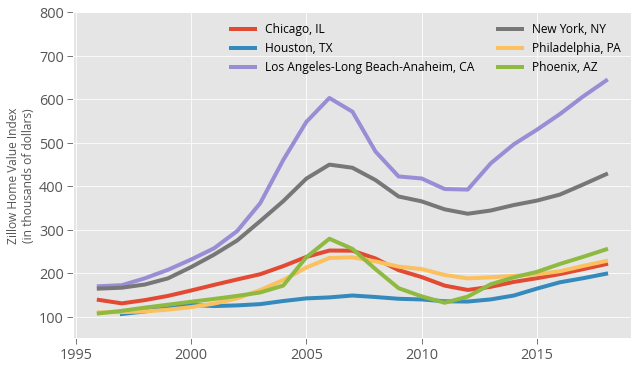

In [89]:
with plt.style.context("ggplot"):

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot for each unique city
    for city in annual_ZHVI["RegionName"].unique():
        
        # select the data for this city
        selection = annual_ZHVI["RegionName"] == city
        df = annual_ZHVI.loc[selection]

        # plot
        ax.plot(df["Year"], df["ZHVI"] / 1e3, label=city, linewidth=4)

    
    # Format the axes
    ax.set_ylim(50, 800)
    ax.legend(loc=0, ncol=2, fontsize=12)
    ax.set_ylabel("Zillow Home Value Index\n(in thousands of dollars)")

### Home values in Philadelphia have only recently recovered to pre-2008 levels

## Plotting the results: Zillow Rent Index

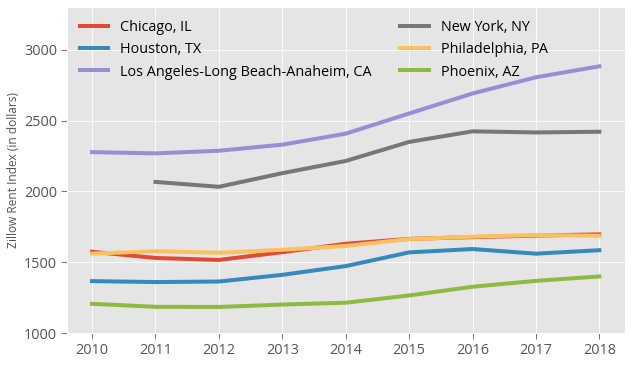

In [90]:
with plt.style.context('ggplot'):
    
    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(10,6))
    
    # Loop over the cities to plot each one
    for city in annual_ZRI['RegionName'].unique():
        
        # Select the city data
        selection = annual_ZRI['RegionName'] == city
        df = annual_ZRI.loc[selection]
        
        # Plot
        ax.plot(df['Year'], df['ZRI'], label=city, linewidth=4)
    
    # Format
    ax.set_ylim(1000, 3300)
    ax.legend(loc=0, ncol=2)
    ax.set_ylabel('Zillow Rent Index (in dollars)')

### Rent prices in Philadelphia have remained relatively flat, relative to other large cities.

## First Homework Assignment

Available on GitHub: 

https://github.com/MUSA-550-Fall-2020/assignment-1

Two parts: 

1. Download and install Python locally on your computer. Instructions in the assignment README!
1. Analyze Zillow ZHVI data by ZIP code in Philadelphia, submitting your Jupyter notebook.

**Due date: next Thursday 9/10 by the start of class (6pm)**

## Next week: Data Visualization Fundamentals

- We'll transition to our "flipped" classroom design
- Pre-recorded lecture will be posted on Sunday evening — this will replace the Tuesday lecture
- Zoom lecture on Thursday will be more lab-based — applying skills from the pre-recorded lecture
- Zoom link for next Thursday will be posted to Canvas

Announcements & reminders will go out on Piazza!

# That's it!

- Stay tuned for announcement of office hours
- Post questions on Piazza!
- Email questions/concerns to nhand@design.upenn.edu